In [1]:
import sys
sys.path.append("..")
from IPython.display import display

In [2]:
import numpy as np
import logging
import pickle
import time
import importlib 
import copy
import os

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse
from matplotlib import gridspec



In [4]:
from scripts import reclusterTree_invM as reclusterTree
from scripts import linkageList
from scripts import heatClustermap
# from scripts import Tree1D_invM as Tree1D
from scripts import likelihood_invM as likelihood
# from scripts import beamsearchTJS
from scripts import N2Greedy_invM as N2Greedy
# from scripts import beamSearch as bs
from scripts import beamSearchOptimal_invM  as BSO
from scripts import jetClustering_invM as jetClustering
from scripts.utils import get_logger
from scripts import auxFunctions_invM as auxFunctions 

In [5]:
logger = get_logger(level=logging.INFO)

In [6]:
plotDir ="../hierarchical-trellis/src/plots/"

In [7]:
"""Reload filles after changes"""
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
# importlib.reload(Tree1D)
importlib.reload(likelihood)
importlib.reload(N2Greedy)
# importlib.reload(bs)
importlib.reload(BSO)
importlib.reload(jetClustering)
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions_invM.py'>

# CLUSTERING ALGORITHMS TESTED ON JETS GENERATED WITH THE TOY GENERATIVE MODEL 

## ANALYSIS

Load truth and reclustered jets 

Format: ["QCDjets", "Wjets"]
All the lists will have "QCDjet" quantities on the 1st entry and "Wjet" ones on the 2nd entry.

In [8]:
multipleBSjets = False
keepAllBSjets = False

In [9]:
# jetLabels = ["Wjets","TrellisMw300","TrellisMw01"]
# jetLabels = ["TrellisMw300","TrellisMw01","TrellisMw01B"]
# jetLabels = ["9_leaves"]
# jetLabels = ["9_leaves_train20000"]
# jetLabels = ["50_leaves_test"]
jetLabels = ["9_leaves_train30000"]
truthDict = {}
GreedyDict ={}
BSODict = {}

In [10]:
Nstart = 0
Nend = 300
N_jets = 100

In [11]:
# jetType="Trellis"
# jetType = "9_leaves_train20000"
# jetType = "50_leaves_all25000"
jetType = "9_leaves_train30000"
truthDict[jetType]  = jetClustering.appendTruthJets(Nstart, Nend, N_jets, truth = True, jetType = jetType)
GreedyDict[jetType]  = jetClustering.appendJets(Nstart, Nend, N_jets, BS = False, Greedy = True, jetType = jetType)
BSODict[jetType]  = jetClustering.appendJets(Nstart, Nend, N_jets, BS = True, Greedy = False, jetType = jetType)

2020-08-20 12:24:33,273:INFO:: TOTAL TIME = 26.023306131362915


In [11]:
len(truthDict[jetType]["jetsList"][0][0]["logLH"])

99

In [14]:
len(GreedyDict[jetType]["jetsList"][0][0]["logLH"])

99

In [15]:
GreedyDict[jetType]["jetsList"][0][18]["logLH"]

array([-14.42163266,  -9.98610523,  -5.71830054,  -3.15454862,
         0.        ,  -1.79689411,   0.        ,  -2.81662562,
         0.        ,   0.        ,  -2.34343672,   0.        ,
        -3.32218934,   0.        ,   0.        ,  -7.70960616,
        -3.88106919,  -2.78166094,   0.        ,  -2.2621424 ,
         0.        ,  -1.76899686,   0.        ,  -1.12320289,
         0.        ,  -0.62193544,   0.        ,  -2.53275602,
         0.        ,   0.        ,  -1.25052321,   0.        ,
        -3.03255347,   0.        ,   0.        ,  -4.82174802,
         0.        ,  -4.21622509,   0.        ,  -3.27699393,
         0.        ,  -2.61505863,   0.        ,  -1.78855785,
         0.        ,  -1.48317748,   0.        ,  -0.68526281,
         0.        ,  -2.53586546,   0.        ,   0.        ,
       -11.00818233,  -7.03719053,  -4.7654889 ,   0.        ,
        -2.57789   ,   0.        ,  -1.38080748,   0.        ,
        -2.93915063,   0.        ,   0.        ,  -5.60

In [16]:
len(GreedyDict[jetType]["jetsList"])

50

In [18]:
lhTuples = [(i,np.sum(GreedyDict[jetType]["jetsList"][1][i]["logLH"])) for i in range(len(GreedyDict[jetType]["jetsList"][1]))]

In [25]:
# [sorted(lhTuples, key=lambda x: x[1]) for i in range(len(lhTuples))]

In [16]:
len(GreedyDict["Trellis"])

1

In [12]:
truth_dic2 = {}
Greedy_dic2 = {}
BSO_dic2 = {}


In [13]:
for label in jetLabels:
    truth_dic2[label], Greedy_dic2[label],  BSO_dic2[label], NGreedyFail, NBSFail =  jetClustering.logLHCut(truthDict[jetType], GreedyDict[jetType] , BSODict[jetType], BSTrellis=multipleBSjets )

In [19]:
label = jetLabels[0]

In [21]:
len(BSO_dic2[label]["jetsList"][0][0])

20

In [33]:
NGreedyFail, NBSFail

(0, 0)

In [34]:
len(Greedy_dic2[jetType]["jetsList"])

50

In [14]:
truth_dic = {}
Greedy_dic = {}
BSO_dic = {}

In [15]:
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions_invM.py'>

In [16]:
jetsperSet = 100
for label in jetLabels:
    truth_dic[label] =auxFunctions.jetsLogLH(Nstart,Nend, truth_dic2[label],jetsperSet ,rerunLH=False)
    Greedy_dic[label]  =auxFunctions.jetsLogLH(Nstart,Nend, Greedy_dic2[label] ,jetsperSet ,rerunLH=False)
    BSO_dic[label]  =auxFunctions.jetsLogLH(Nstart,Nend, BSO_dic2[label], jetsperSet  ,rerunLH=False, BSTrellis = multipleBSjets, keepJets = keepAllBSjets)

len(Dic[jetsList]) =  300
len(Dic[jetsList]) =  300
len(Dic[jetsList]) =  300


In [17]:
len(BSO_dic[label]["jetsList"])

30000

In [31]:
# BSO_dic[label]["jetsList"][0]

In [18]:
for label in jetLabels:
    print(label)
    print(" Truth mean logLH =  %0.1f $\pm$ %0.1f" %(np.average(truth_dic[label]["avgLogLH"]),  truth_dic[label]["sigma"]))
    print(" Greedy mean logLH = %0.1f $\pm$ %0.1f" %(np.average(Greedy_dic[label]["avgLogLH"]),  Greedy_dic[label]["sigma"]))
    print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f" %(np.average(BSO_dic[label]["avgLogLH"]),  BSO_dic[label]["sigma"]))
    print("---"*5)

9_leaves_train30000
 Truth mean logLH =  nan $\pm$ nan
 Greedy mean logLH = nan $\pm$ nan
 Beam Search mean logLH = nan $\pm$ nan
---------------


In [29]:

for jetList in BSO_dic[label]["jetsList"]: 
        BS_jet["sumlogLH"] = sum(BS_jet['logLH'])
        

NameError: name 'BS_jet' is not defined

In [22]:
len(BSO_dic[jetType]["jetsList"])

20000

In [49]:
# BS_jet_MLE = []
# for jets in BSO_dic[jetType]["jetsList"]:
#     BS_jet_MLE+=[jets[0]]

In [87]:
# if not keepAllBSjets:
#     BSO_dic[jetType]["jetsList"] = BS_jet_MLE

In [12]:
jetLabels = ["50_leaves_train20000"]

### Save Truth

In [33]:
save=False
# outdir = "../hierarchical-trellis/src/data/invMassGinkgo/"
outdir = "/Users/sebastianmacaluso/Documents/PrinceData/invMassGinkgo/"
Nmax = 2000
if save:
    for label in jetLabels:
        if keepAllBSjets:
            out_filename = os.path.join(outdir, "TruthBSGreedy_"+label+"_"+str(Nmax)+"_jets.pkl")
        else:
#             out_filename = os.path.join(outdir, "TruthBSmaxGreedy_"+label+".pkl")
            out_filename = os.path.join(outdir, "BS_"+label+".pkl")
                
        with open(out_filename, "wb") as f:
            pickle.dump(BSO_dic[label]["jetsList"], f, protocol=2)
#             pickle.dump(( truth_dic[label]["jetsList"][0:Nmax], BSO_dic[label]["jetsList"][0:Nmax],Greedy_dic[label]["jetsList"][0:Nmax]), f, protocol=2)

### Save all

In [19]:
save=True
# outdir = "../hierarchical-trellis/src/data/invMassGinkgo/"
outdir = "/Users/sebastianmacaluso/Documents/PrinceData/invMassGinkgo/"
Nmax = 2000
if save:
    for label in jetLabels:
        if keepAllBSjets:
            out_filename = os.path.join(outdir, "TruthBSGreedy_"+label+"_"+str(Nmax)+"_jets.pkl")
        else:
            out_filename = os.path.join(outdir, "TruthBSmaxGreedy_"+label+".pkl")
            
                
        with open(out_filename, "wb") as f:
            pickle.dump(( truth_dic[label]["jetsList"], BSO_dic[label]["jetsList"],Greedy_dic[label]["jetsList"]), f, protocol=2)
#             pickle.dump(( truth_dic[label]["jetsList"][0:Nmax], BSO_dic[label]["jetsList"][0:Nmax],Greedy_dic[label]["jetsList"][0:Nmax]), f, protocol=2)

In [11]:
len(np.asarray(GreedyDict["Trellis"]["jetsList"]).flatten())

5000

In [15]:
# with open(dicsDir + "jetDicts"+str(N_jets) + "Mw.pkl", "rb") as fd:
#     truthDict, GreedyDict,BSODict = pickle.load(fd, encoding='latin-1')

In [55]:
computeDijAngles = False
if computeDijAngles:
    truthDict = auxFunctions.scanJets(truthDict, dijmetrics=False,  angles=True)
    GreedyDict = auxFunctions.scanJets(GreedyDict, dijmetrics=False,  angles=True)
    BSODict = auxFunctions.scanJets(BSODict, dijmetrics=False,  angles=True)

In [12]:
for jetType in jetLabels:
    truthDict[jetType]["Nconst"] = [len(jet["leaves"]) for jet in np.asarray(truthDict[jetType]["jetsList"]).flatten()]

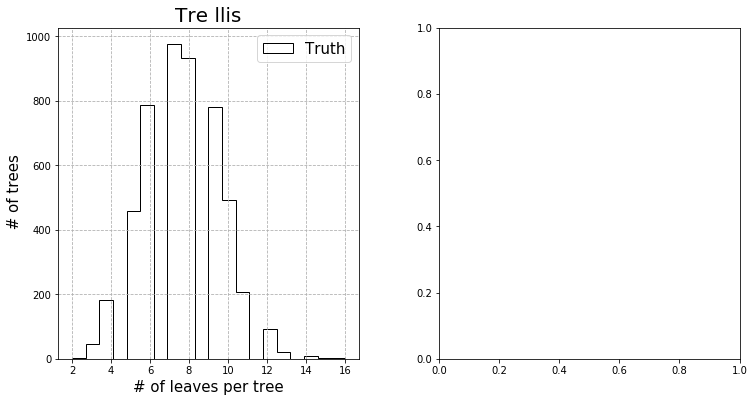

In [13]:

""" Number of constituents"""
auxFunctions.algoHist(truthDict, jetLabels = jetLabels,bins = 20,  fixedJetP = False, xLabel = "# of leaves per tree", yLabel = " # of trees", variable = "Nconst")

### Rerun Beam Search to keep all the jets in the beam

In [10]:
def load_jets(filename):
    root_dir  = "../hierarchical-trellis/src/data/invMassGinkgo/"
    filename = os.path.join(root_dir, filename)
    with open(filename + ".pkl", "rb") as fd:
        Truth, BS, Greedy = pickle.load(fd, encoding='latin-1')
    return Truth, BS, Greedy

In [11]:
gt_jets, bs_jets, greedy_jets = load_jets("TruthBSGreedy_Trellis")

In [19]:
BSO_jetsList = [] 
for truth_jet in gt_jets:

    N = len(truth_jet["leaves"])
    Nbest =min(3 * N, np.asarray(N * (N - 1) / 2).astype(int))
    
    BSO_jetsList.append(BSO.recluster(
            truth_jet,
            beamSize=Nbest,
            delta_min=truth_jet["pt_cut"],
            lam=float(truth_jet["Lambda"]),
            N_best=Nbest,
            visualize = True,
        ))



In [28]:
bs_jets[1]["sumlogLH"]

-46.95396350233846

In [32]:
len(BSO_jetsList)

5000

In [35]:
BSO_jetsList[1][0]['sumlogLH']

-46.95396350233846

In [33]:
for jetList in BSO_jetsList:
    for i,BS_jet in enumerate(jetList):
        BS_jet["sumlogLH"] = sum(BS_jet['logLH'])
    

In [23]:
len(BSO_jetsList[0])

27

In [36]:
save=True
outdir = "../hierarchical-trellis/src/data/invMassGinkgo/"
if save:
    for label in jetLabels:
        out_filename = os.path.join(outdir, "TruthBSGreedy_"+label+".pkl")
        with open(out_filename, "wb") as f:
            pickle.dump(( gt_jets, BSO_jetsList, greedy_jets), f, protocol=2)

## Truth jets only

In [10]:
Nstart = 50
Nend = 250
N_jets = 100

In [11]:
jetType = "50_leaves_train20000"
truthDict[jetType]  = jetClustering.appendTruthJetsOnly(Nstart, Nend, N_jets, truth = True, jetType = jetType)

/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
2020-05-26 17:47:42,886:INFO:: TOTAL TIME = 101.08560585975647


In [12]:
len(truthDict[jetType]["jetsList"])

200

In [18]:
root_dir = "/Users/sebastianmacaluso/Documents/PrinceData/"
filename = "invMassGinkgo/50_leaves_train20000/Truth/tree_100_truth_2"
filename = os.path.join(root_dir, filename)
with open(filename + ".pkl", "rb") as fd:
    Truth  = pickle.load(fd, encoding='latin-1')

In [19]:
Truth[0]

{'root_id': 0, 'tree': array([[ 1, 82],
        [ 2, 11],
        [ 3, 10],
        [ 4,  9],
        [ 5,  8],
        [ 6,  7],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [12, 45],
        [13, 44],
        [14, 35],
        [15, 30],
        [16, 27],
        [17, 26],
        [18, 25],
        [19, 24],
        [20, 23],
        [21, 22],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [28, 29],
        [-1, -1],
        [-1, -1],
        [31, 34],
        [32, 33],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [36, 43],
        [37, 42],
        [38, 41],
        [39, 40],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [46, 73],
        [47, 54],
        [48, 53],
        [49, 52],
        [50, 51],
        [-1, -1],
        [-1, -1],
        [-1, -1],
        [-1, -1],
      